## Tree stats

`tskit` lets you perform efficient calculations of statistics along the genome, often many times quicker than other software! You may be interested in calculating...

 - statistics derived from the allele frequency spectrum like nucleotide diversity, Tajima's D, f2...
 - IBD-based quantities
 - tree-based statistics like genealogical nearest neighbours and tree balance metrics...

Let's look at `tskit`'s new *tree balance* statistics as an example. A balanced (binary) tree is perfectly symmetric in some way: each node has an equally sized subtree descending from its left- and right- branches, where 'size' is determined by some metric involving the tree's nodes and edges.  `tskit` now contains several different metrics to calculate how unbalanced each tree is:

In [1]:
import msprime # used to generate datasets
import tskit
import numpy as np
import matplotlib.pyplot as plt # used for plots
import pandas as pd

In [2]:
ts = msprime.sim_ancestry( # 1Mb human-ish tree sequence
            samples=1e4,
            sequence_length=1e6,
            random_seed=408,
            recombination_rate=1e-8,
            population_size = 10000
)

In [28]:
imbalance = pd.DataFrame({
    "genomic position" : [tree.interval.left for tree in ts.trees()],
    "b1" : [tree.b1_index() for tree in ts.trees()],
    "b2" : [tree.b2_index() for tree in ts.trees()],
    "colless" : [tree.colless_index() for tree in ts.trees()],
    "sackin" : [tree.sackin_index() for tree in ts.trees()]
}).set_index("genomic position")

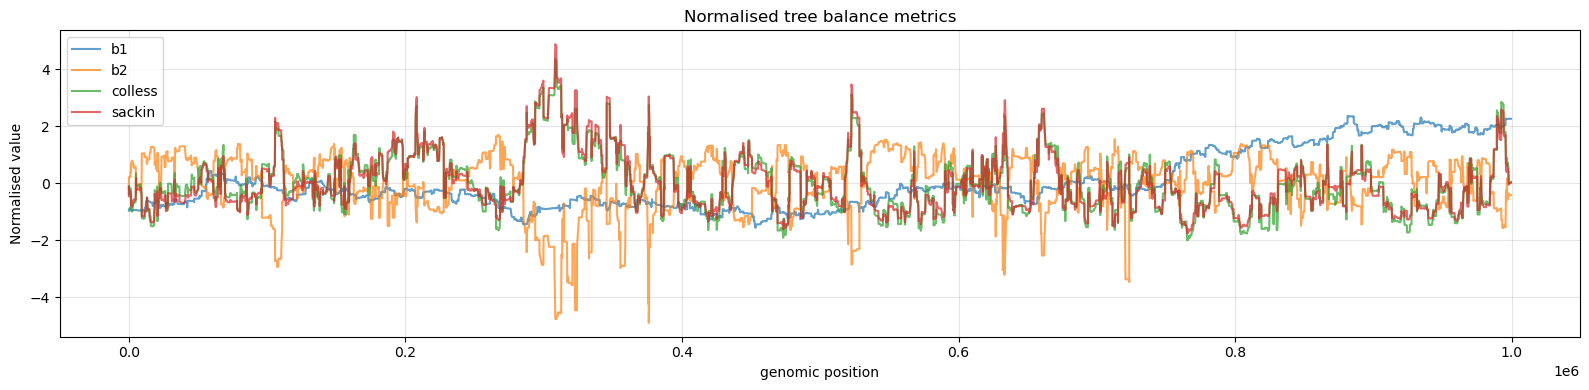

In [30]:
ax = ((imbalance - imbalance.mean()) / imbalance.std()).plot(figsize=(16, 4), alpha=0.7)
ax.grid("xy", color='grey', alpha=0.2)
ax.set_ylabel("Normalised value")
ax.set_title("Normalised tree balance metrics")
plt.tight_layout()
plt.savefig("images/tree_balance.pdf");